In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sdf = pd.read_csv('abalone.csv')
sdf.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
sdf.isna().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [ ]:
#Description of the dataset
sdf.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
sdf.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


In [ ]:
sdf.shape

(4177, 9)

In [ ]:
sexll = LabelEncoder()
sdf['Sex'] = sexll.fit_transform(sdf['Sex'])
sdf.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


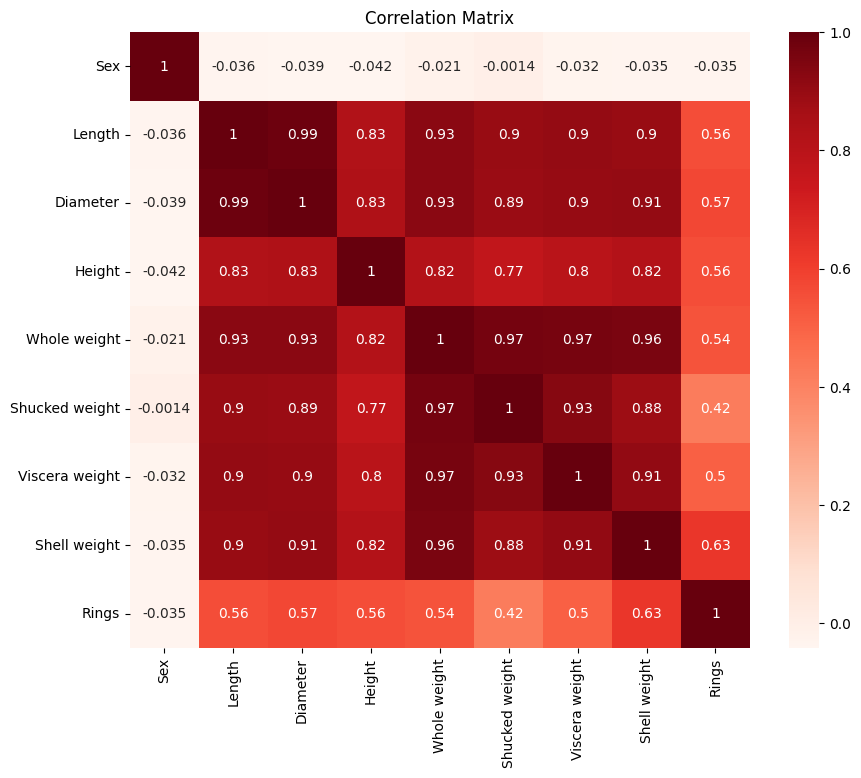

In [ ]:
corr_matrix = sdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Display the correlation values for the 'Rings' feature
print(corr_matrix['Rings'])

Sex              -0.034627
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64


In [ ]:
x = sdf.drop('Rings',axis=1)
y = sdf['Rings']

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

scaled_df = pd.DataFrame(scaled_features,
                                  columns=x.columns)

# Check the shape of the scaled features
print(f'Scaled features shape: {scaled_df.shape}')

print("Scaled House Dataframe:")
scaled_df.head()

Scaled features shape: (4177, 8)
Scaled House Dataframe:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757


In [ ]:
import random
random.seed(75)

#Regression Equation and line generation

# Split the dataset
x_train,x_test,y_train,y_test = train_test_split(scaled_df,
                                                y, test_size=0.2,
                                                random_state=42)

In [ ]:
# Build the linear regression and fit the data
lrm = LinearRegression()
lrm.fit(x_train,y_train)

# Print coefficients and intercepts
print("Coefficients:", lrm.coef_)
print()
print("Intercept:", lrm.intercept_)

Coefficients: [ 0.06921584 -0.184856    1.34929596  0.47879555  4.49014876 -4.58987171
 -0.9593192   1.20374671]

Intercept: 9.934552051844221


In [ ]:
lrm.score(x_train,y_train)

0.5264768075017208

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
import numpy as np
from sklearn.metrics import mean_squared_error

# 5-fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(lrm, x, y, cv=kf)

bias = np.mean(y_pred-y)
# Variance: Calculate variability and sensitivity
variance = np.var(y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("Bias:", bias)
print("Variance:", variance)
print("MSE:", mse)

Bias: 0.001327490233759174
Variance: 5.555695138652318
MSE: 5.014629500667564


In [ ]:
# Build the ridge regression and fit the data
rrm = Ridge()
rrm.fit(x_train,y_train)

# Print coefficients and intercepts
print("Coefficients:", rrm.coef_)
print()
print("Intercept:", rrm.intercept_)

Coefficients: [ 0.06869183 -0.17352     1.33448919  0.47995882  4.26881045 -4.4841873
 -0.90995521  1.27884904]

Intercept: 9.934359200535082


In [ ]:
rrm.score(x_train,y_train)

0.5264363858223291

In [ ]:
# Build the Lasso regression and fit the data
lassom = Lasso()
lassom.fit(x_train,y_train)

# Print coefficients and intercepts
print("Coefficients:", lassom.coef_)
print()
print("Intercept:", lassom.intercept_)

Coefficients: [-0.          0.          0.          0.          0.          0.
  0.          1.00745439]

Intercept: 9.93847002644878


In [ ]:
lassom.score(x_train,y_train)

0.2956643325338636

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9386983384015141

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.5577617886818369

In [ ]:
models = {
    "Linear Regression": lrm,
    "Ridge Regression": rrm,
    "Lasso Regression": lassom,
    "Random Forest": rfr,
    "Support Vector Regressor": svr
}

results = []

# Evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Add results to the list
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display results
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,1.630561,5.062538,2.250008,0.532338
1,Ridge Regression,1.631347,5.062764,2.250059,0.532317
2,Lasso Regression,2.006868,7.682589,2.771748,0.290306
3,Random Forest,1.571054,4.981859,2.232008,0.539791
4,Support Vector Regressor,1.524396,4.997555,2.235521,0.538341


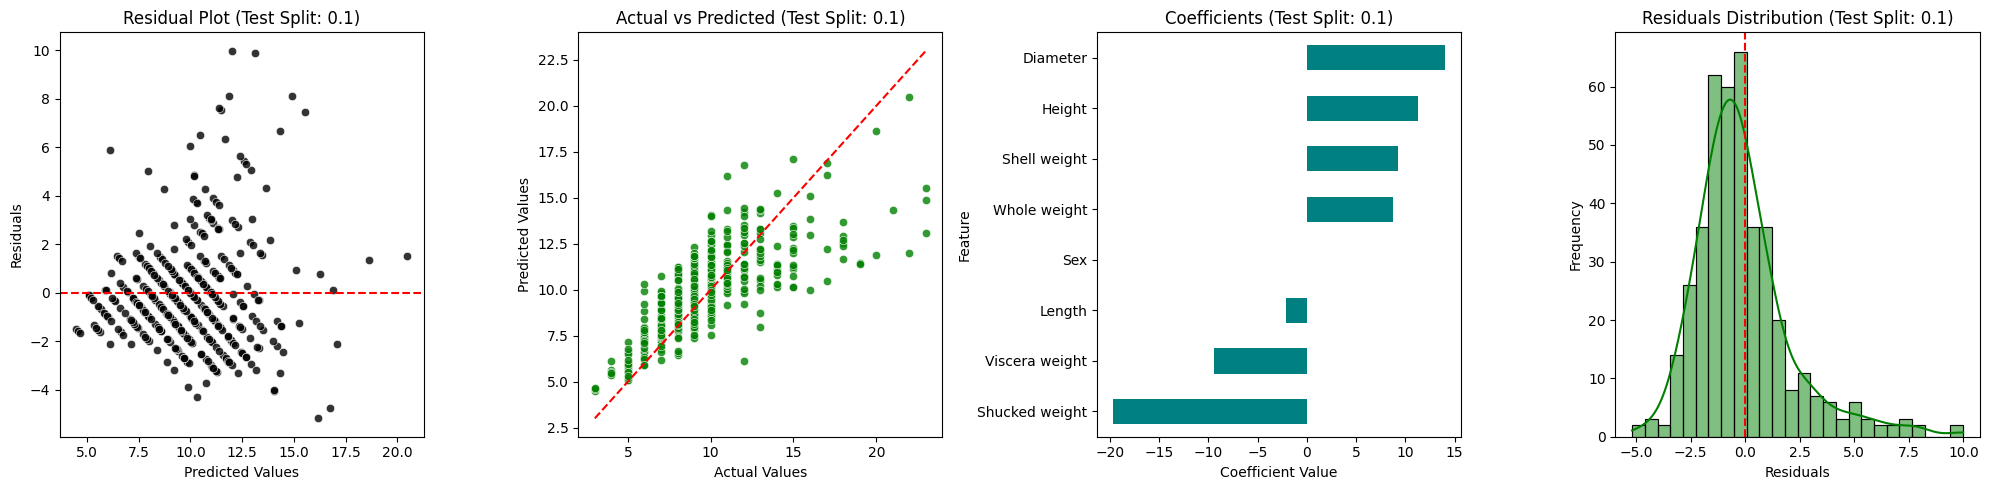

In [ ]:
# Split 0.1
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1,
                                                    random_state=42)
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Residual Plot (Split 0.1)
sns.scatterplot(ax=axes[0], x=y_pred,
                y=residuals, alpha=0.8, color="black")
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (Test Split: 0.1)")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Actual vs Predicted Plot (Split 0.1)
sns.scatterplot(ax=axes[1], x=y_test, y=y_pred,
                alpha=0.8, color="green")
axes[1].plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Actual vs Predicted (Test Split: 0.1)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# Coefficients Plot (Split 0.1)
coefficients = pd.Series(lrm.coef_, index=x.columns)
coefficients.sort_values().plot(kind="barh",
                                color="teal", ax=axes[2])
axes[2].set_title("Coefficients (Test Split: 0.1)")
axes[2].set_xlabel("Coefficient Value")
axes[2].set_ylabel("Feature")

# Residuals Distribution Plot (Split 0.1)
sns.histplot(residuals, kde=True, color="green", ax=axes[3])
axes[3].axvline(x=0, color='red', linestyle='--')
axes[3].set_title("Residuals Distribution (Test Split: 0.1)")
axes[3].set_xlabel("Residuals")
axes[3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

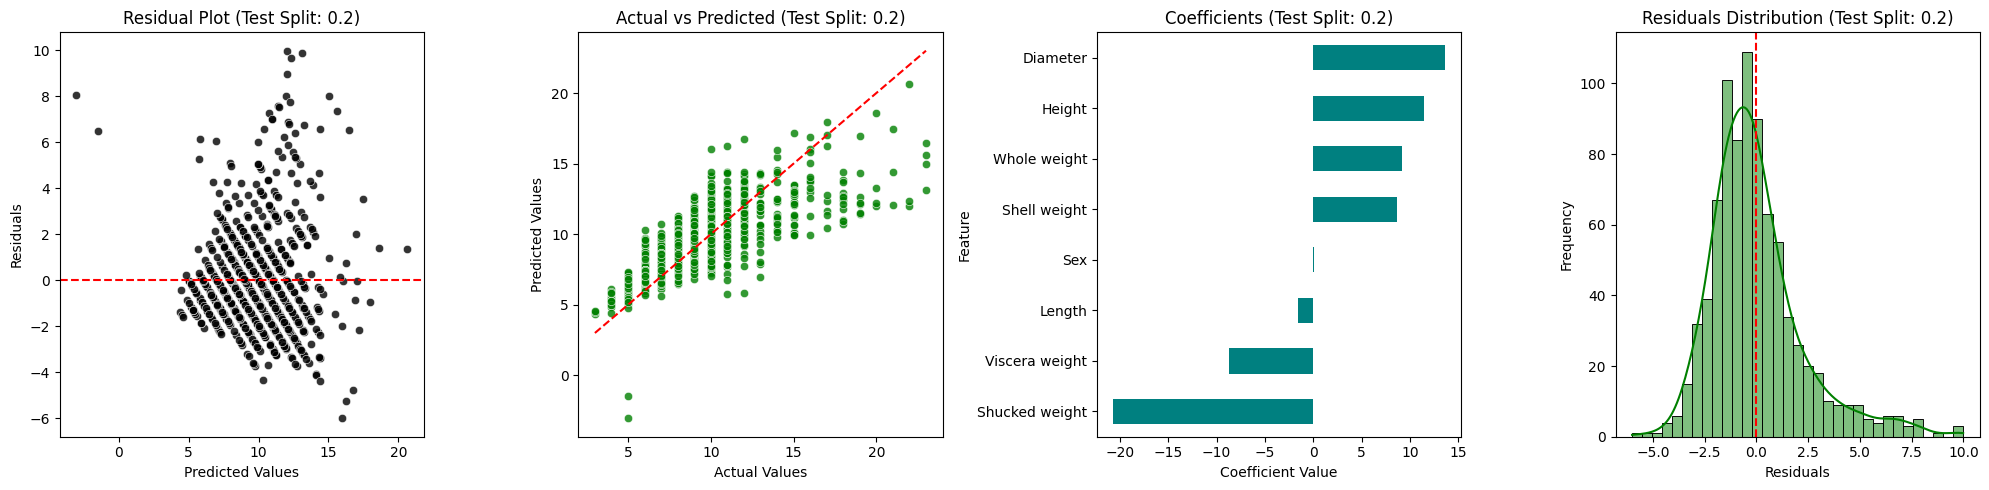

In [ ]:
# Split 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Residual Plot (Split 0.2)
sns.scatterplot(ax=axes[0], x=y_pred,
                y=residuals, alpha=0.8, color="black")
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (Test Split: 0.2)")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Actual vs Predicted Plot (Split 0.2)
sns.scatterplot(ax=axes[1], x=y_test, y=y_pred,
                alpha=0.8, color="green")
axes[1].plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Actual vs Predicted (Test Split: 0.2)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# Coefficients Plot (Split 0.2)
coefficients = pd.Series(lrm.coef_, index=x.columns)
coefficients.sort_values().plot(kind="barh",
                                color="teal", ax=axes[2])
axes[2].set_title("Coefficients (Test Split: 0.2)")
axes[2].set_xlabel("Coefficient Value")
axes[2].set_ylabel("Feature")

# Residuals Distribution Plot (Split 0.2)
sns.histplot(residuals, kde=True, color="green", ax=axes[3])
axes[3].axvline(x=0, color='red', linestyle='--')
axes[3].set_title("Residuals Distribution (Test Split: 0.2)")
axes[3].set_xlabel("Residuals")
axes[3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

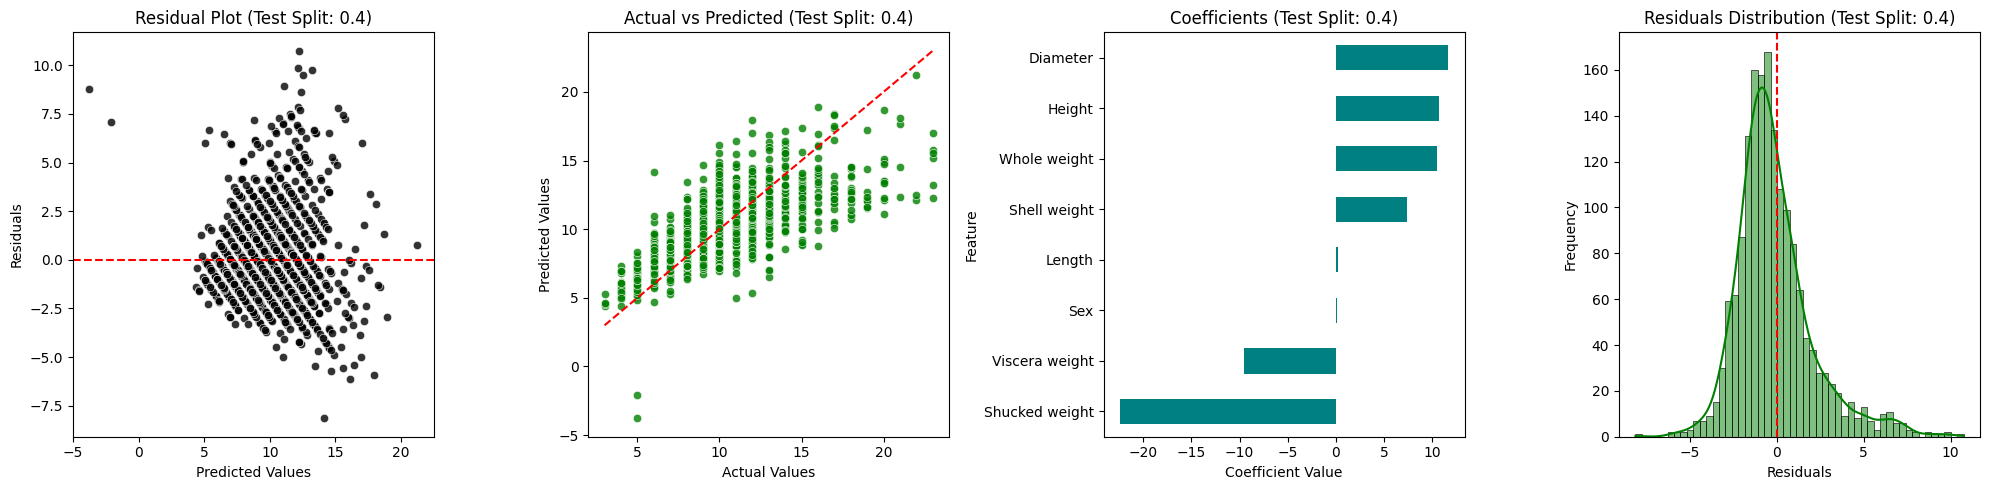

In [ ]:
# Split 0.4
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.4,
                                                    random_state=42)
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Residual Plot (Split 0.4)
sns.scatterplot(ax=axes[0], x=y_pred, y=residuals,
                alpha=0.8, color="black")
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (Test Split: 0.4)")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Actual vs Predicted Plot (Split 0.4)
sns.scatterplot(ax=axes[1], x=y_test, y=y_pred,
                alpha=0.8, color="green")
axes[1].plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Actual vs Predicted (Test Split: 0.4)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# Coefficients Plot (Split 0.4)
coefficients = pd.Series(lrm.coef_, index=x.columns)
coefficients.sort_values().plot(kind="barh",
                                color="teal", ax=axes[2])
axes[2].set_title("Coefficients (Test Split: 0.4)")
axes[2].set_xlabel("Coefficient Value")
axes[2].set_ylabel("Feature")

# Residuals Distribution Plot (Split 0.4)
sns.histplot(residuals, kde=True, color="green", ax=axes[3])
axes[3].axvline(x=0, color='red', linestyle='--')
axes[3].set_title("Residuals Distribution (Test Split: 0.4)")
axes[3].set_xlabel("Residuals")
axes[3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

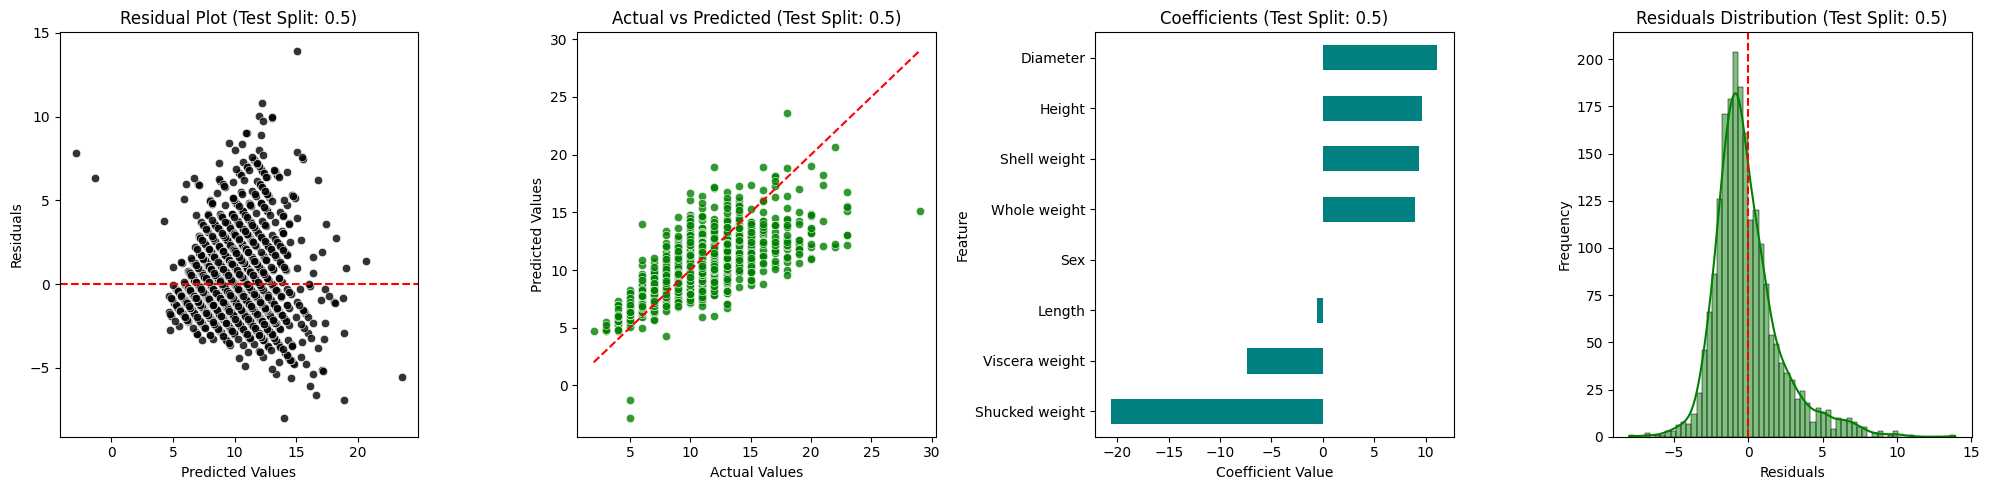

In [ ]:
# Split 0.5
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.5,
                                                    random_state=42)
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Residual Plot (Split 0.5)
sns.scatterplot(ax=axes[0], x=y_pred,
                y=residuals, alpha=0.8, color="black")
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (Test Split: 0.5)")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Actual vs Predicted Plot (Split 0.5)
sns.scatterplot(ax=axes[1], x=y_test, y=y_pred,
                alpha=0.8, color="green")
axes[1].plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Actual vs Predicted (Test Split: 0.5)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# Coefficients Plot (Split 0.5)
coefficients = pd.Series(lrm.coef_, index=x.columns)
coefficients.sort_values().plot(kind="barh",
                                color="teal", ax=axes[2])
axes[2].set_title("Coefficients (Test Split: 0.5)")
axes[2].set_xlabel("Coefficient Value")
axes[2].set_ylabel("Feature")

# Residuals Distribution Plot (Split 0.5)
sns.histplot(residuals, kde=True, color="green", ax=axes[3])
axes[3].axvline(x=0, color='red', linestyle='--')
axes[3].set_title("Residuals Distribution (Test Split: 0.5)")
axes[3].set_xlabel("Residuals")
axes[3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

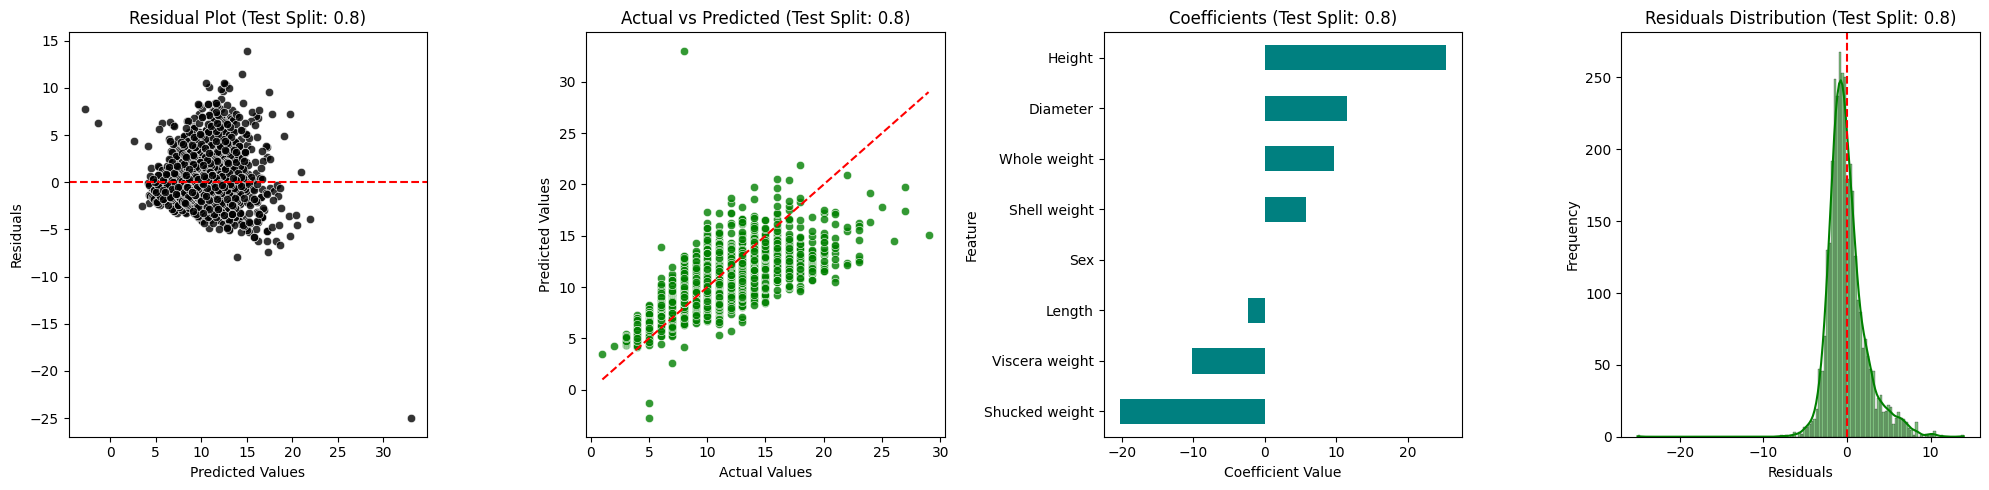

In [ ]:
# Split 0.8
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.8,
                                                    random_state=42)
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Residual Plot (Split 0.8)
sns.scatterplot(ax=axes[0], x=y_pred,
                y=residuals, alpha=0.8, color="black")
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (Test Split: 0.8)")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Actual vs Predicted Plot (Split 0.8)
sns.scatterplot(ax=axes[1], x=y_test, y=y_pred,
                alpha=0.8, color="green")
axes[1].plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Actual vs Predicted (Test Split: 0.8)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# Coefficients Plot (Split 0.8)
coefficients = pd.Series(lrm.coef_, index=x.columns)
coefficients.sort_values().plot(kind="barh",
                                color="teal", ax=axes[2])
axes[2].set_title("Coefficients (Test Split: 0.8)")
axes[2].set_xlabel("Coefficient Value")
axes[2].set_ylabel("Feature")

# Residuals Distribution Plot (Split 0.8)
sns.histplot(residuals, kde=True, color="green", ax=axes[3])
axes[3].axvline(x=0, color='red', linestyle='--')
axes[3].set_title("Residuals Distribution (Test Split: 0.8)")
axes[3].set_xlabel("Residuals")
axes[3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Inference:**

* The maximum possible score of the linear regression model is 0.55, even after cross validation and hyperparameter tuning.
* From the prediction and visualizations, it is clear that height and shucked weight impact the prediction more, with their coefficients being higher as a proof of concept.
* From the prediction and visualizations, it seems that sex and length very lightly impact the rings prediction, with very high/low correlation with all the other independent features in the correlation matrix being a proof of concept.
* There is very less bias(0.0013), and the model is performing well.
* There is slightly more variance(5.57), and the variablity is high or the data is sensitive.
* Regarding the train-test split, as the test data size increases, the model has insufficient data for learning and the residuals increase from the expected threshold. Always, the conventional 80-20 split or the 70-30 is the best for learning ML models.
